# Two goals for today:

1. Figure out how to filter our the SOURCEIDs which I marked as "yes, unusable" in my manual investigations of lightcurves

2. Make updated HR diagrams of all these sources, with the Teff/SpT co-axes

In [1]:
# 1. Load up a filtered list.
# Probably this will be something I can kind of crib from a recent Jupyter notebook

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.table
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u

from wuvars.data import spreadsheet, photometry, quality_classes
from wuvars.analysis.spectral_type_to_number import get_num_from_SpT, get_SpT_from_num
from wuvars.analysis.spectral_type_to_temperature import get_Teff_from_SpT, get_SpT_from_Teff
from wuvars.analysis.luhman16_coord_handler import coords_from_Luhman_table

plt.style.use('seaborn-whitegrid')


In [4]:
from importlib import reload
import wuvars.analysis.spectral_type_to_temperature
reload(wuvars.analysis.spectral_type_to_temperature)

<module 'wuvars.analysis.spectral_type_to_temperature' from '/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/spectral_type_to_temperature.py'>

In [5]:
lc_dir = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes/BD_lcs_v3"

inspect_onc = pd.read_csv(os.path.join(lc_dir, "inspection_onc.csv"), skipinitialspace=True)
inspect_ngc = pd.read_csv(os.path.join(lc_dir, "inspection_ngc.csv"), skipinitialspace=True)
inspect_ic = pd.read_csv(os.path.join(lc_dir, "inspection_ic.csv"), skipinitialspace=True)



In [6]:
onc_spread = spreadsheet.load_wserv_v2(5)
onc_q = quality_classes.load_q(5)

ngc_spread = spreadsheet.load_wserv_v2(7)
ngc_q = quality_classes.load_q(7)

ic_spread = spreadsheet.load_wserv_v2(8)
ic_q = quality_classes.load_q(8)


In [7]:
rejected_sources_onc = inspect_onc['SOURCEID'][inspect_onc['exclude?'] == 'yes']
rejected_sources_ngc = inspect_ngc['SOURCEID'][inspect_ngc['exclude?'] == 'yes']
rejected_sources_ic = inspect_ic['SOURCEID'][inspect_ic['exclude?'] == 'yes']

approved_sources_onc = inspect_onc['SOURCEID'][inspect_onc['exclude?'] != 'yes']
approved_sources_ngc = inspect_ngc['SOURCEID'][inspect_ngc['exclude?'] != 'yes']
approved_sources_ic = inspect_ic['SOURCEID'][inspect_ic['exclude?'] != 'yes']

In [8]:
approved_sources_onc

0      44199508515375
1      44199508515199
2      44199508515224
3      44199508475055
4      44199508514291
            ...      
390    44199508565017
391    44199508565887
392    44199508565551
393    44199508565550
394    44199508565969
Name: SOURCEID, Length: 333, dtype: int64

In [9]:
%run ../bd_matching_onc.py

In [10]:
approved_indices_onc = np.in1d(lowmass_matches.index, approved_sources_onc)
not_lowmass = (matched['Teff'] > 3200)

(17.0, 10.12665958404541)

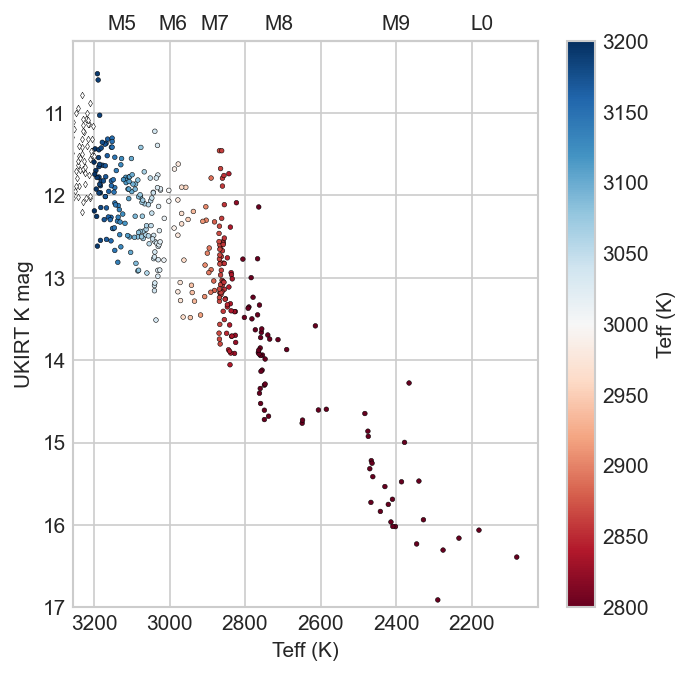

In [11]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=150)

plt.scatter(
    lowmass_matched['Teff'][approved_indices_onc], 
    lowmass_matches['KAPERMAG3'][approved_indices_onc], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=lowmass_matched['Teff'][approved_indices_onc],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("UKIRT K mag")
cbar.set_label("Teff (K)")
plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')


plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

plt.scatter(
    matched['Teff'][not_lowmass], 
    matches['KAPERMAG3'][not_lowmass], 
    s=5, 
    ec='k',
    marker='d',
    linewidths=0.25,
    facecolor='w',
)
plt.xlim(xlims)
plt.ylim(ylims)

secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(spt_xticks)
spt_xticks_minor = np.arange(4.5, 12, 0.5)
secax.set_xticks(spt_xticks_minor, minor=True)
# secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
xticks = secax.get_xticks()
new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
secax.set_xticklabels(new_xtick_labels)

ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

In [12]:
onc_spt = np.array([get_SpT_from_Teff(x) for x in lowmass_matched['Teff']])
not_lowmass_onc_spt = np.array([get_SpT_from_Teff(x) for x in matched['Teff']])

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


(17.0, 10.12665958404541)

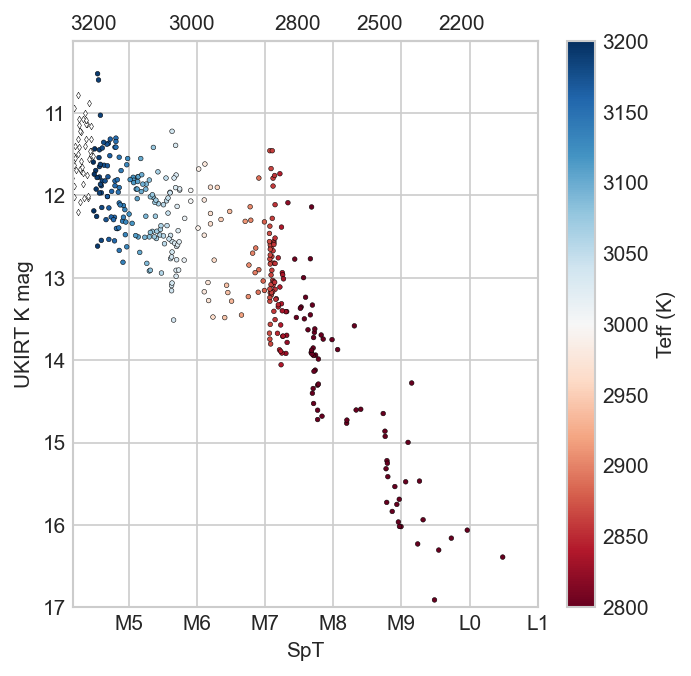

In [13]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=150)

plt.scatter(
    onc_spt[approved_indices_onc], 
    lowmass_matches['KAPERMAG3'][approved_indices_onc], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=lowmass_matched['Teff'][approved_indices_onc],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("UKIRT K mag")
cbar.set_label("Teff (K)")
plt.xlabel("SpT")
# plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')


# plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

plt.scatter(
    not_lowmass_onc_spt[not_lowmass], 
    matches['KAPERMAG3'][not_lowmass], 
    s=5, 
    ec='k',
    marker='d',
    linewidths=0.25,
    facecolor='w',
)
plt.xlim(xlims)
plt.ylim(ylims)


xticks_minor = np.arange(4.5, 11.5, 0.5)
ax.set_xticks(xticks_minor, minor=True)
xticks = ax.get_xticks()
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)


secax = ax.secondary_xaxis('top', functions=(get_Teff_from_SpT, get_SpT_from_Teff))

teff_xticks = [3200, 3000, 2800, 2500, 2200]
# spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(teff_xticks)
teff_xticks_minor = np.arange(3200, 1900, -100)
secax.set_xticks(teff_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# xticks = secax.get_xticks()
# new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
# secax.set_xticklabels(new_xtick_labels)

ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator


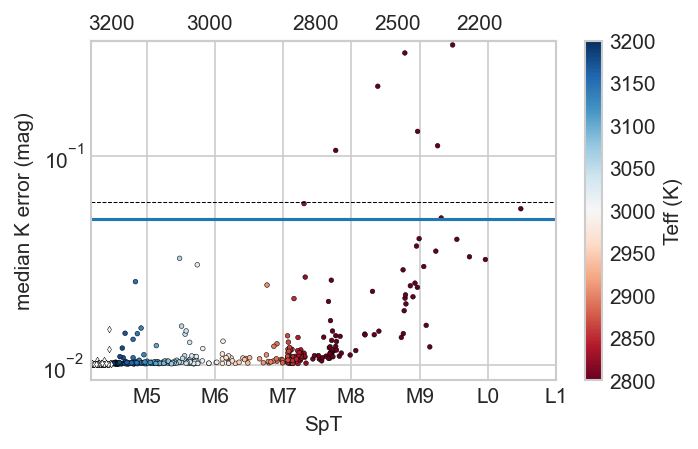

In [19]:
fig, ax = plt.subplots(1, figsize=(5,3), dpi=150)

plt.scatter(
    onc_spt[approved_indices_onc], 
    lowmass_matches['KAPERMAG3ERR'][approved_indices_onc], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=lowmass_matched['Teff'][approved_indices_onc],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



# plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("median K error (mag)")
cbar.set_label("Teff (K)")
plt.xlabel("SpT")
# plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')


# plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

ax.semilogy()

plt.scatter(
    not_lowmass_onc_spt[not_lowmass], 
    matches['KAPERMAG3ERR'][not_lowmass], 
    s=5, 
    ec='k',
    marker='d',
    linewidths=0.25,
    facecolor='w',
)
plt.xlim(xlims)
plt.ylim(ylims)

ax.axhline(0.05)
ax.axhline(0.06, color='k', lw=0.5, ls='--')

xticks_minor = np.arange(4.5, 11.5, 0.5)
ax.set_xticks(xticks_minor, minor=True)
xticks = ax.get_xticks()
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)


secax = ax.secondary_xaxis('top', functions=(get_Teff_from_SpT, get_SpT_from_Teff))

teff_xticks = [3200, 3000, 2800, 2500, 2200]
# spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(teff_xticks)
teff_xticks_minor = np.arange(3200, 1900, -100)
secax.set_xticks(teff_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# xticks = secax.get_xticks()
# new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
# secax.set_xticklabels(new_xtick_labels)

# ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

In [20]:
%run ../bd_matching_ngc1333.py

In [21]:
approved_indices_ngc = np.in1d(lowmass_ngc_joint_matches['SOURCEID'], approved_sources_ngc)

In [22]:
ngc_teff = np.array([get_Teff_from_SpT(x) for x in lowmass_ngc_joint_matches['Adopt']])
print(ngc_teff)

[2632.5  3023.75 2286.5  2710.   2710.   3057.5  2555.   2173.   2400.
 3057.5  2990.   2400.   3197.5  2632.5  2632.5  2935.   3125.   3125.
 2286.5  3125.   2795.   3125.   3091.25 2632.5  2990.   2935.   3023.75
 2263.8  2880.   2935.   3023.75 2752.5  2990.   2990.   3057.5  2710.
 3057.5  2400.   3125.   3161.25 2173.   2400.   2632.5  2990.   2990.
 3057.5  2555.   3023.75 2880.   2990.   2795.   2400.   2400.   2880.
 2990.   2710.   2752.5  3197.5  2990.   2400.   2173.   3057.5  3023.75
 2990.   3125.   2710.   3057.5  2632.5  2710.   3197.5  2710.   2400.
 2962.5  3091.25 2795.   2990.   1983.   3091.25 3023.75 2400.   3057.5
 3125.   3091.25 2679.   3161.25 3125.   3023.75 3057.5  1649.   2880.
 2795.   3161.25 3197.5  3057.5  3057.5  3197.5  2710.   2173.   2648.
 2400.   2935.   2907.5  2837.5  3197.5  3125.  ]


In [23]:
not_lowmass_ngc_teff = np.array([get_Teff_from_SpT(x) for x in joint_matches['Adopt']])
not_lowmass_ngc = np.array(L16_SpT_num)[sep_constraint] < 4.5

In [24]:
len(joint_matches['Adopt']), len(np.array(L16_SpT_num)[sep_constraint])

(186, 186)

[Text(5, 1, 'M5'),
 Text(6, 1, 'M6'),
 Text(7, 1, 'M7'),
 Text(8, 1, 'M8'),
 Text(9, 1, 'M9'),
 Text(10, 1, 'L0'),
 Text(11, 1, 'L1'),
 Text(12, 1, 'L2'),
 Text(13, 1, 'L3')]

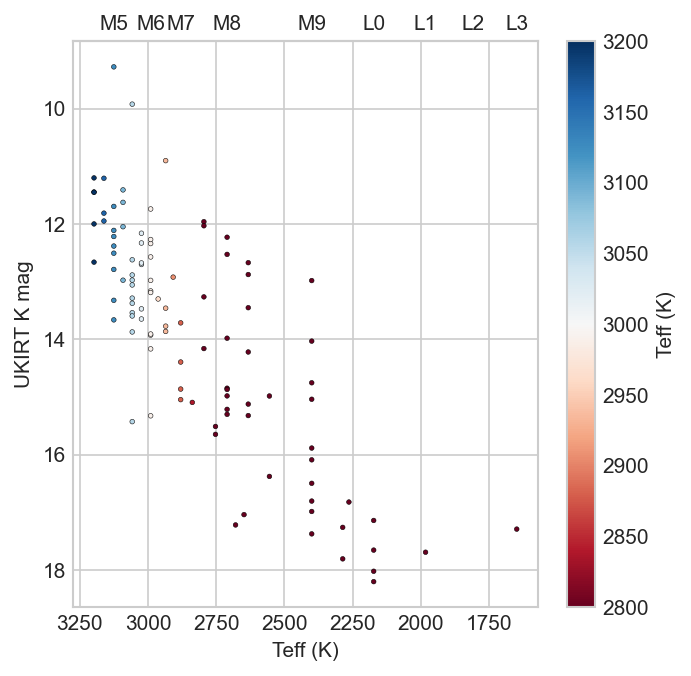

In [25]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=150)

plt.scatter(
    ngc_teff[approved_indices_ngc], 
    lowmass_ngc_joint_matches['KAPERMAG3'][approved_indices_ngc], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=ngc_teff[approved_indices_ngc],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("UKIRT K mag")
cbar.set_label("Teff (K)")
plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')


plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

# plt.scatter(
#     not_lowmass_ngc_teff[sep_constraint][not_lowmass_ngc], 
#     matches['KAPERMAG3'][not_lowmass_ngc], 
#     s=5, 
#     ec='k',
#     marker='d',
#     linewidths=0.25,
#     facecolor='w',
# )
plt.xlim(xlims)
plt.ylim(ylims)

secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

spt_xticks = np.arange(5, 14, 1)
secax.set_xticks(spt_xticks)
spt_xticks_minor = np.arange(4.5, 14, 0.5)
secax.set_xticks(spt_xticks_minor, minor=True)
# secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
xticks = secax.get_xticks()
new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
secax.set_xticklabels(new_xtick_labels)

# ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


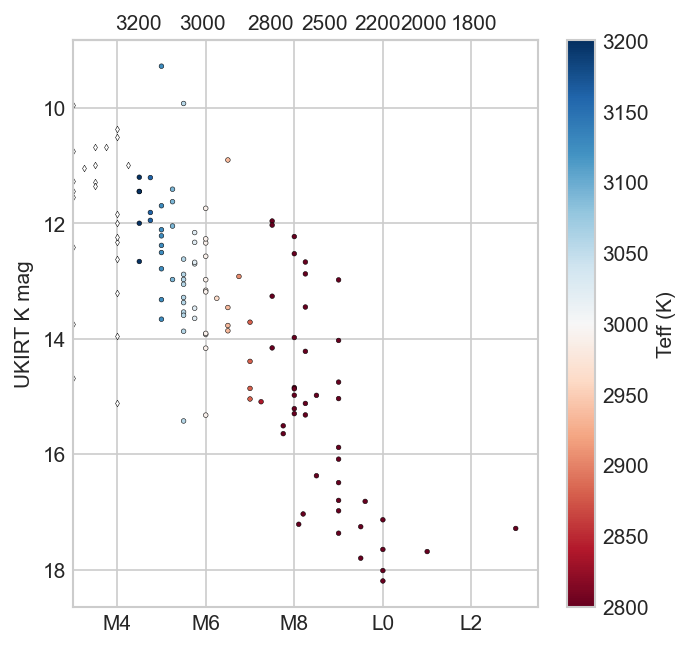

In [26]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=150)

plt.scatter(
    np.array(L16_SpT_num)[L16_lowmass_ngc][approved_indices_ngc], 
    lowmass_ngc_joint_matches['KAPERMAG3'][approved_indices_ngc], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=ngc_teff[approved_indices_ngc],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("UKIRT K mag")
cbar.set_label("Teff (K)")
# plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')



# plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

plt.scatter(
    np.array(L16_SpT_num)[sep_constraint][not_lowmass_ngc], 
    matches['KAPERMAG3'][not_lowmass_ngc], 
    s=5, 
    ec='k',
    marker='d',
    linewidths=0.25,
    facecolor='w',
)
plt.xlim(3, xlims[1])
plt.ylim(ylims)


xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 14, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)


secax = ax.secondary_xaxis('top', functions=(get_Teff_from_SpT, get_SpT_from_Teff))


teff_xticks = [3200, 3000, 2800, 2500, 2200, 2000, 1800]
# spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(teff_xticks)
teff_xticks_minor = np.arange(3200, 1600, -100)
secax.set_xticks(teff_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

# spt_xticks = np.arange(5, 14, 1)
# secax.set_xticks(spt_xticks)
# spt_xticks_minor = np.arange(4.5, 14, 0.5)
# secax.set_xticks(spt_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# xticks = secax.get_xticks()
# new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
# secax.set_xticklabels(new_xtick_labels)

# ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator


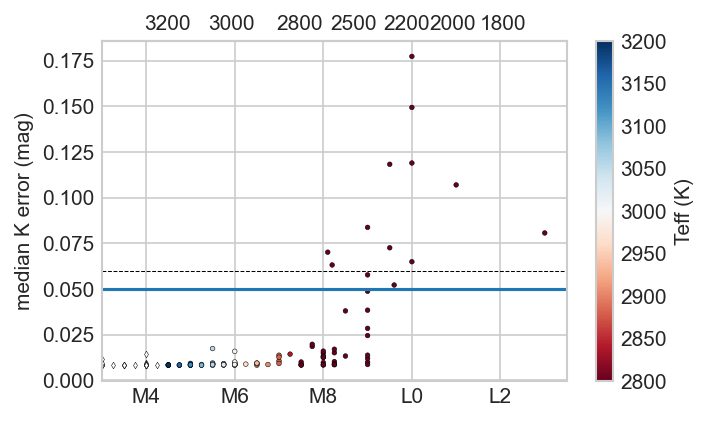

In [29]:
fig, ax = plt.subplots(1, figsize=(5,3), dpi=150)

plt.scatter(
    np.array(L16_SpT_num)[L16_lowmass_ngc][approved_indices_ngc], 
    lowmass_ngc_joint_matches['KAPERMAG3ERR'][approved_indices_ngc], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=ngc_teff[approved_indices_ngc],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



# plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("median K error (mag)")
cbar.set_label("Teff (K)")
# plt.xlabel("Teff (K)")


# ax.semilogy()

# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')



# plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

plt.scatter(
    np.array(L16_SpT_num)[sep_constraint][not_lowmass_ngc], 
    matches['KAPERMAG3ERR'][not_lowmass_ngc], 
    s=5, 
    ec='k',
    marker='d',
    linewidths=0.25,
    facecolor='w',
)
plt.xlim(3, xlims[1])
plt.ylim(ylims)

ax.axhline(0.05)
ax.axhline(0.06, color='k', lw=0.5, ls='--')


xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 14, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)

# ax.set_yticks([0.01, 0.1])
# ax.set_yticklabels(['0.01', '0.1'])

secax = ax.secondary_xaxis('top', functions=(get_Teff_from_SpT, get_SpT_from_Teff))


teff_xticks = [3200, 3000, 2800, 2500, 2200, 2000, 1800]
# spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(teff_xticks)
teff_xticks_minor = np.arange(3200, 1600, -100)
secax.set_xticks(teff_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

# spt_xticks = np.arange(5, 14, 1)
# secax.set_xticks(spt_xticks)
# spt_xticks_minor = np.arange(4.5, 14, 0.5)
# secax.set_xticks(spt_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# xticks = secax.get_xticks()
# new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
# secax.set_xticklabels(new_xtick_labels)

# ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

In [28]:
ax.set_yticks?

In [30]:
%run ../bd_matching_ic348.py

In [31]:
approved_indices_ic = np.in1d(lowmass_ic_joint_matches['SOURCEID'], approved_sources_ic)

In [32]:
ic_teff = np.array([get_Teff_from_SpT(x) for x in lowmass_ic_joint_matches['Adopt']])
print(ic_teff)

[3091.25 3197.5  2173.   3197.5  3125.   2795.   3125.   2229.75 3091.25
 2935.   3023.75 2837.5  3125.   3197.5  2400.   2990.   3023.75 2710.
 2837.5  2907.5  2990.   3125.   3023.75 3023.75 3125.   3125.   2173.
 3161.25 3091.25 3161.25 2990.   3057.5  3125.   3125.   3161.25 3023.75
 3125.   3023.75 2935.   3197.5  2400.   3161.25 3197.5  3023.75 3023.75
 2632.5  3091.25 2990.   2632.5  3057.5  3091.25 3023.75 3057.5  2400.
 3125.   2400.   2795.   3091.25 2400.   3125.   2710.   3091.25 2990.
 3161.25 2795.   2400.   2632.5  2907.5  3091.25 3023.75 2880.   3091.25
 3161.25 2710.   3161.25 3161.25 3161.25 3125.   3161.25 3057.5  3023.75
 3125.   3197.5  3161.25 3057.5  3057.5  2990.   1983.   3161.25 3125.
 2632.5  2632.5  2400.   3125.   3161.25 3161.25 1983.   3057.5  3023.75
 3197.5  3125.   2990.   3057.5  2632.5  2935.   2990.   2710.   3057.5
 3057.5  3091.25 2990.   3091.25 3057.5  3125.   3197.5  3125.   3057.5
 3125.   3125.   3197.5  2555.   2477.5  2990.   2837.5  3057.5

In [33]:
not_lowmass_ic_teff = np.array([get_Teff_from_SpT(x) for x in joint_matches['Adopt']])
not_lowmass_ic = np.array(L16_SpT_num)[sep_constraint] < 4.5

[Text(5, 1, 'M5'),
 Text(6, 1, 'M6'),
 Text(7, 1, 'M7'),
 Text(8, 1, 'M8'),
 Text(9, 1, 'M9'),
 Text(10, 1, 'L0'),
 Text(11, 1, 'L1'),
 Text(12, 1, 'L2'),
 Text(13, 1, 'L3')]

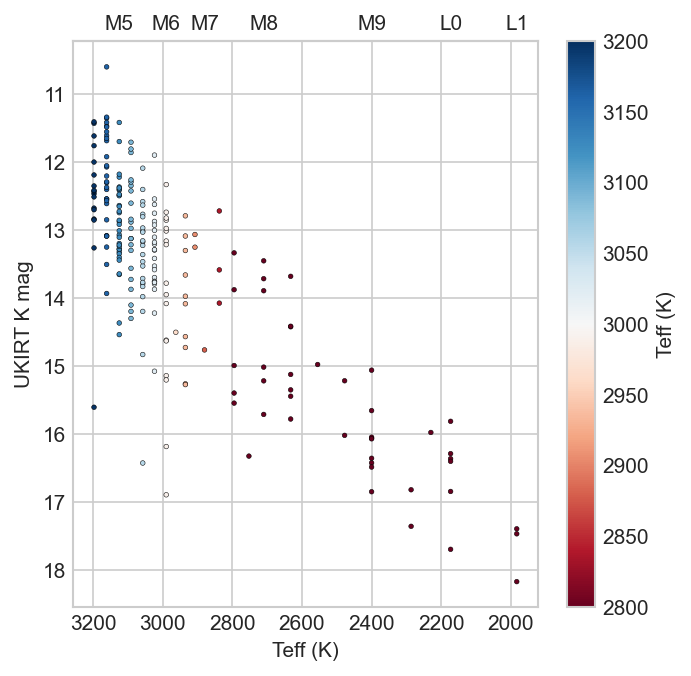

In [34]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=150)

plt.scatter(
    ic_teff[approved_indices_ic], 
    lowmass_ic_joint_matches['KAPERMAG3'][approved_indices_ic], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=ic_teff[approved_indices_ic],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("UKIRT K mag")
cbar.set_label("Teff (K)")
plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')


plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

# plt.scatter(
#     not_lowmass_ic_teff[sep_constraint][not_lowmass_ic], 
#     matches['KAPERMAG3'][not_lowmass_ic], 
#     s=5, 
#     ec='k',
#     marker='d',
#     linewidths=0.25,
#     facecolor='w',
# )
plt.xlim(xlims)
plt.ylim(ylims)

secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

spt_xticks = np.arange(5, 14, 1)
secax.set_xticks(spt_xticks)
spt_xticks_minor = np.arange(4.5, 14, 0.5)
secax.set_xticks(spt_xticks_minor, minor=True)
# secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
xticks = secax.get_xticks()
new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
secax.set_xticklabels(new_xtick_labels)

# ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


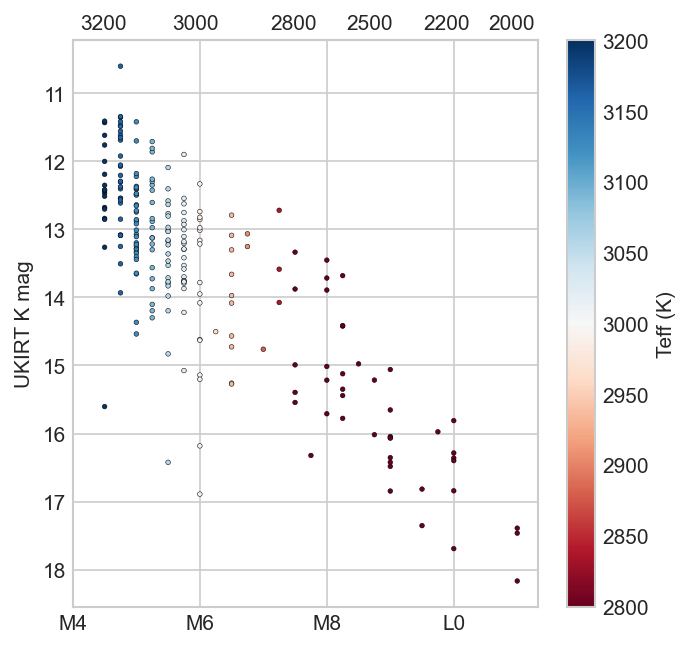

In [35]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=150)

plt.scatter(
    np.array(L16_SpT_num)[L16_lowmass_ic & sep_constraint][approved_indices_ic], 
    lowmass_ic_joint_matches['KAPERMAG3'][approved_indices_ic], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=ic_teff[approved_indices_ic],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("UKIRT K mag")
cbar.set_label("Teff (K)")
# plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')



# plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

# plt.scatter(
#     np.array(L16_SpT_num)[sep_constraint][not_lowmass_ic], 
#     matches['KAPERMAG3'][not_lowmass_ic], 
#     s=5, 
#     ec='k',
#     marker='d',
#     linewidths=0.25,
#     facecolor='w',
# )
plt.xlim(4, xlims[1])
plt.ylim(ylims)


xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 11.5, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)


secax = ax.secondary_xaxis('top', functions=(get_Teff_from_SpT, get_SpT_from_Teff))


teff_xticks = [3200, 3000, 2800, 2500, 2200, 2000, 1800]
# spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(teff_xticks)
teff_xticks_minor = np.arange(3200, 1600, -100)
secax.set_xticks(teff_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

# spt_xticks = np.arange(5, 14, 1)
# secax.set_xticks(spt_xticks)
# spt_xticks_minor = np.arange(4.5, 14, 0.5)
# secax.set_xticks(spt_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# xticks = secax.get_xticks()
# new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
# secax.set_xticklabels(new_xtick_labels)

# ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator


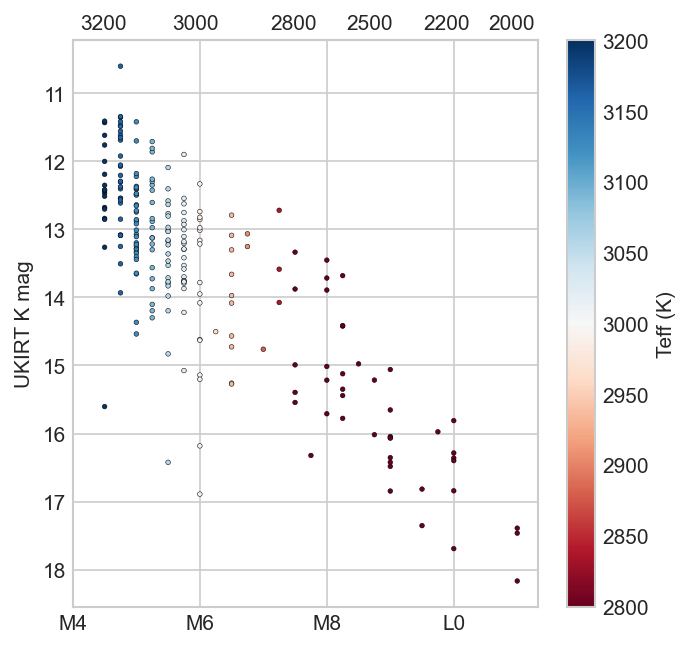

In [36]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=150)

plt.scatter(
    np.array(L16_SpT_num)[L16_lowmass_ic & sep_constraint][approved_indices_ic], 
    lowmass_ic_joint_matches['KAPERMAG3'][approved_indices_ic], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=ic_teff[approved_indices_ic],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("UKIRT K mag")
cbar.set_label("Teff (K)")
# plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')



# plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

# plt.scatter(
#     np.array(L16_SpT_num)[sep_constraint][not_lowmass_ic], 
#     matches['KAPERMAG3'][not_lowmass_ic], 
#     s=5, 
#     ec='k',
#     marker='d',
#     linewidths=0.25,
#     facecolor='w',
# )
plt.xlim(4, xlims[1])
plt.ylim(ylims)


xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 11.5, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)


secax = ax.secondary_xaxis('top', functions=(get_Teff_from_SpT, get_SpT_from_Teff))


teff_xticks = [3200, 3000, 2800, 2500, 2200, 2000, 1800]
# spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(teff_xticks)
teff_xticks_minor = np.arange(3200, 1600, -100)
secax.set_xticks(teff_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

# spt_xticks = np.arange(5, 14, 1)
# secax.set_xticks(spt_xticks)
# spt_xticks_minor = np.arange(4.5, 14, 0.5)
# secax.set_xticks(spt_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# xticks = secax.get_xticks()
# new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
# secax.set_xticklabels(new_xtick_labels)

# ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator


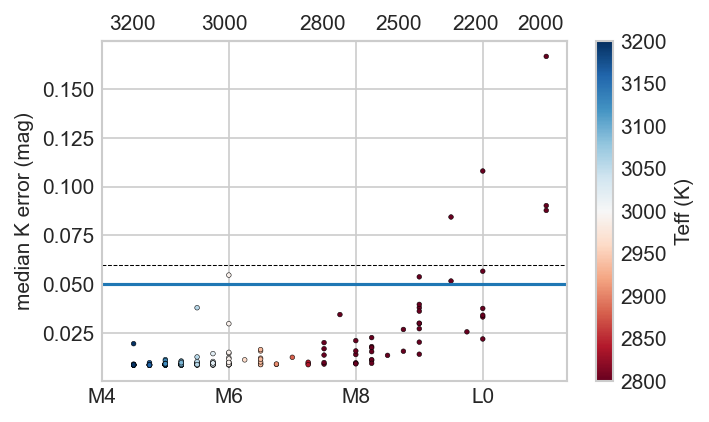

In [38]:
fig, ax = plt.subplots(1, figsize=(5,3), dpi=150)

plt.scatter(
    np.array(L16_SpT_num)[L16_lowmass_ic & sep_constraint][approved_indices_ic], 
    lowmass_ic_joint_matches['KAPERMAG3ERR'][approved_indices_ic], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=ic_teff[approved_indices_ic],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



# plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("median K error (mag)")
cbar.set_label("Teff (K)")
# plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')



# plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

# plt.scatter(
#     np.array(L16_SpT_num)[sep_constraint][not_lowmass_ic], 
#     matches['KAPERMAG3'][not_lowmass_ic], 
#     s=5, 
#     ec='k',
#     marker='d',
#     linewidths=0.25,
#     facecolor='w',
# )
plt.xlim(4, xlims[1])
plt.ylim(ylims)

ax.axhline(0.05)
ax.axhline(0.06, color='k', lw=0.5, ls='--')


xticks = ax.get_xticks()
xticks_minor = np.arange(4.5, 11.5, 0.5)
ax.set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
ax.set_xticklabels(new_xtick_labels)


secax = ax.secondary_xaxis('top', functions=(get_Teff_from_SpT, get_SpT_from_Teff))


teff_xticks = [3200, 3000, 2800, 2500, 2200, 2000, 1800]
# spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(teff_xticks)
teff_xticks_minor = np.arange(3200, 1600, -100)
secax.set_xticks(teff_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

# spt_xticks = np.arange(5, 14, 1)
# secax.set_xticks(spt_xticks)
# spt_xticks_minor = np.arange(4.5, 14, 0.5)
# secax.set_xticks(spt_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# xticks = secax.get_xticks()
# new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
# secax.set_xticklabels(new_xtick_labels)

# ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

Text(0.5, 0, 'median J error (mag)')

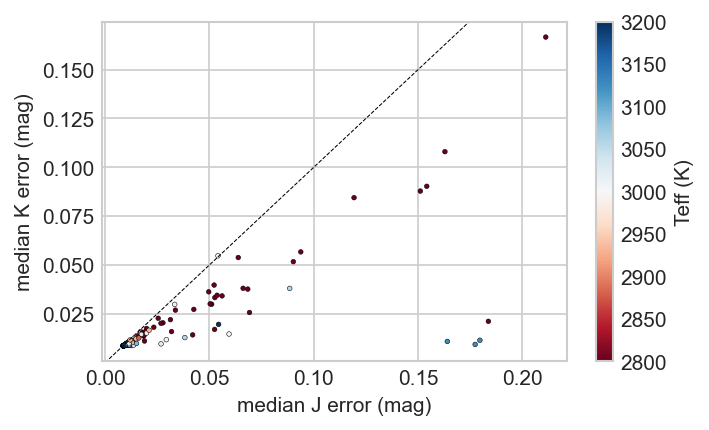

In [83]:
fig, ax = plt.subplots(1, figsize=(5,3), dpi=150)

plt.scatter(
    lowmass_ic_joint_matches['JAPERMAG3ERR'][approved_indices_ic], 
    lowmass_ic_joint_matches['KAPERMAG3ERR'][approved_indices_ic], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=ic_teff[approved_indices_ic],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)



# plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("median K error (mag)")
cbar.set_label("Teff (K)")
# plt.xlabel("Teff (K)")


# plt.title("ONC members with estimated Teff - Robberto+20")

# plt.axhline(10.5, ls='--')
# plt.axvline(3200)

# plt.text(2800, 10.36, "Photometric\nSaturation\u2191", c='C0')



# plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

# plt.scatter(
#     np.array(L16_SpT_num)[sep_constraint][not_lowmass_ic], 
#     matches['KAPERMAG3'][not_lowmass_ic], 
#     s=5, 
#     ec='k',
#     marker='d',
#     linewidths=0.25,
#     facecolor='w',
# # )
# plt.xlim(4, xlims[1])
# plt.ylim(ylims)


# xticks = ax.get_xticks()
# xticks_minor = np.arange(4.5, 11.5, 0.5)
# ax.set_xticks(xticks_minor, minor=True)
# new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
# ax.set_xticklabels(new_xtick_labels)


# secax = ax.secondary_xaxis('top', functions=(get_Teff_from_SpT, get_SpT_from_Teff))


# teff_xticks = [3200, 3000, 2800, 2500, 2200, 2000, 1800]
# # spt_xticks = np.arange(5, 12, 1)
# secax.set_xticks(teff_xticks)
# teff_xticks_minor = np.arange(3200, 1600, -100)
# secax.set_xticks(teff_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

# spt_xticks = np.arange(5, 14, 1)
# secax.set_xticks(spt_xticks)
# spt_xticks_minor = np.arange(4.5, 14, 0.5)
# secax.set_xticks(spt_xticks_minor, minor=True)
# # secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# xticks = secax.get_xticks()
# new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
# secax.set_xticklabels(new_xtick_labels)

# ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

ax.plot([0,0.2], [0, 0.2], 'k--', lw=0.5, scalex=False, scaley=False)
ax.set_xlabel("median J error (mag)")

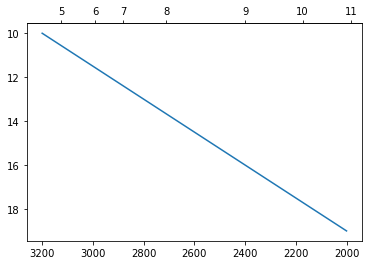

In [25]:
# a minimal example! without any actual data
# this seems to do what I want:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html#secondary-axis

fig, ax = plt.subplots(1)

ax.plot(np.linspace(3200, 2000, 10), np.arange(10)+10)
ax.invert_xaxis()
ax.invert_yaxis()

# ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

# secax.get_xticklabels()
# secax.set_xticks([5, 6, 7, 8, 9, 10, 11])

[Text(5, 1, 'M5'),
 Text(6, 1, 'M6'),
 Text(7, 1, 'M7'),
 Text(8, 1, 'M8'),
 Text(9, 1, 'M9'),
 Text(10, 1, 'L0'),
 Text(11, 1, 'L1')]

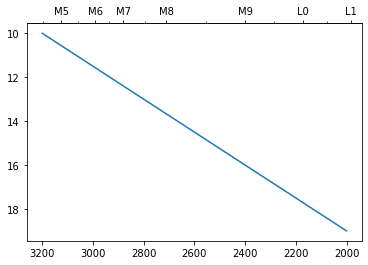

In [26]:
# a minimal example! without any actual data
# this seems to do what I want:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html#secondary-axis

fig, ax = plt.subplots(1)

ax.plot(np.linspace(3200, 2000, 10), np.arange(10)+10)
ax.invert_xaxis()
ax.invert_yaxis()

# ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)

secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))


# secax.set_xticks([5, 6, 7, 8, 9, 10, 11])
spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(spt_xticks)
spt_xticks_minor = np.arange(4.5, 12, 0.5)
secax.set_xticks(spt_xticks_minor, minor=True)
# secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
xticks = secax.get_xticks()
new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
secax.set_xticklabels(new_xtick_labels)
# print(new_xtick_labels)

In [27]:
get_SpT_from_num(5), get_SpT_from_num(6)

('M5', 'M6')

In [96]:
isinstance?

In [101]:
isinstance(5, (int,np.integer))

True

In [106]:
np.float32(3.0)

3.0

In [22]:
ax.set_xticks?